In [72]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
data = pd.read_csv("/Users/jacopobinati/Desktop/Prediction ML/assignment1/DA3-phdma/HM1/morg-2014-emp.csv")
data
print(data.info())

#Data imported correctly since we have 149316 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_31123/2765086427.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/jacopobinati/Desktop/Prediction ML/assignment1/DA3-phdma/HM1/morg-2014-emp.csv")


We will keep only workers in the cathegory: Medial and health services manager. 
The Census Code is: 0350
The SOC CODE is 11-9111

In [66]:
filtered_data = data[(data['occ2012'] >= 2600) & (data['occ2012'] <= 2920)]
summary = filtered_data.describe()
summary_code = filtered_data['occ2012'].describe()
print(filtered_data.info())

# create the variable wage per hour: w
filtered_data['w'] = filtered_data['earnwke'] / filtered_data['uhours']
filtered_data['lnw'] = np.log(filtered_data['w'])


/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_31123/3842565181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['w'] = filtered_data['earnwke'] / filtered_data['uhours']
/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_31123/3842565181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['lnw'] = np.log(filtered_data['w'])


In [67]:
# Seems there is a problem with outlier values.
# Filter and drop observations where 'earnwke' is higher than 2840
data3 = filtered_data[filtered_data['earnwke'] <= 2840]
columns_of_interest = ['earnwke', 'uhours', 'w'] 
specific_columns_stats = data3[columns_of_interest].describe()
print(specific_columns_stats)

           earnwke       uhours            w
count  2215.000000  2215.000000  2215.000000
mean    928.160853    37.286682    24.546575
std     578.915590    11.332715    15.167183
min       1.000000     1.000000     0.021412
25%     500.000000    37.000000    14.850000
50%     840.000000    40.000000    21.625000
75%    1250.000000    40.000000    30.764500
max    2808.000000    90.000000   200.000000


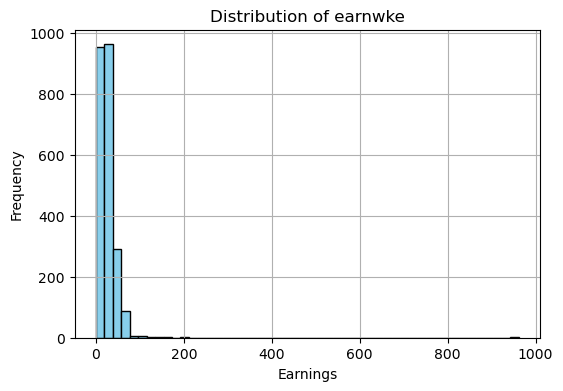

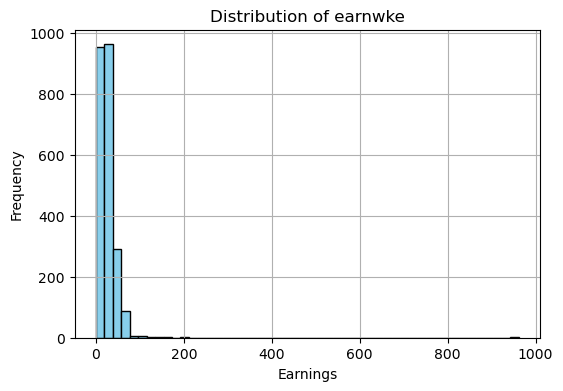

In [73]:
earnwke_data = filtered_data['w']
#make bins smaller

# Plotting the distribution using a histogram
plt.figure(figsize=(6, 4))
plt.hist(earnwke_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of earnwke')
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

earnwke_data2 = data3['w']
#make bins smaller

# Plotting the distribution using a histogram
plt.figure(figsize=(6, 4))
plt.hist(earnwke_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of earnwke')
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [74]:
reg1 = smf.ols(formula="lnw~age", data=data3).fit()
reg1.summary()

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     158.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.23e-35
Time:                        17:52:00   Log-Likelihood:                -2001.8
No. Observations:                2215   AIC:                             4008.
Df Residuals:                    2213   BIC:                             4019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5445      0.041     61.969      0.000       2.464       2.625
age            0.0129      0.001     12.602      0.000       0.011       0.015
==============================================================================
Omnibus:                     1310.636   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47538.618
Skew:                          -2.191   Prob(JB):                         0.00
Kurtosis:                      25.269   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's create the first model. what we take in consideration is the varibale 'earnwke' as target and the variable 'uhours' as predictor.

In [69]:
# FIRST ATTEMP
predictor = ['age']
target = 'w'
X = filtered_data[predictor]
y = filtered_data[target]
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

#R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

#Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.031231885919504654
Mean Squared Error: 664.9964528020689


/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

In [70]:
# SECOND ATTEMP
predictor = ['age']
target = ['w']
X = data3[predictor]
y = data3[target]
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

#R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

#Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.06393928445493058
Mean Squared Error: 215.23740880682047


/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be rem

Let's build a second model where we take in consideration a second